In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 

In [2]:
#Create a model class

class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        #how many layers are there and for each layer we create an attribute
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
        #Input layer(4 features) -> h1 N -> h2 N-> Output (3 Classes)
       
    
    def forward(self,x):
        
        #passing the layers into the activation function
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
        

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Users/Anant/Downloads/pytorch-udemy/PYTORCH_NOTEBOOKS/Data/iris.csv')

In [6]:
df.head()

#target is just the class of the dataset as in what class does the flower belong to either 0,1,2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


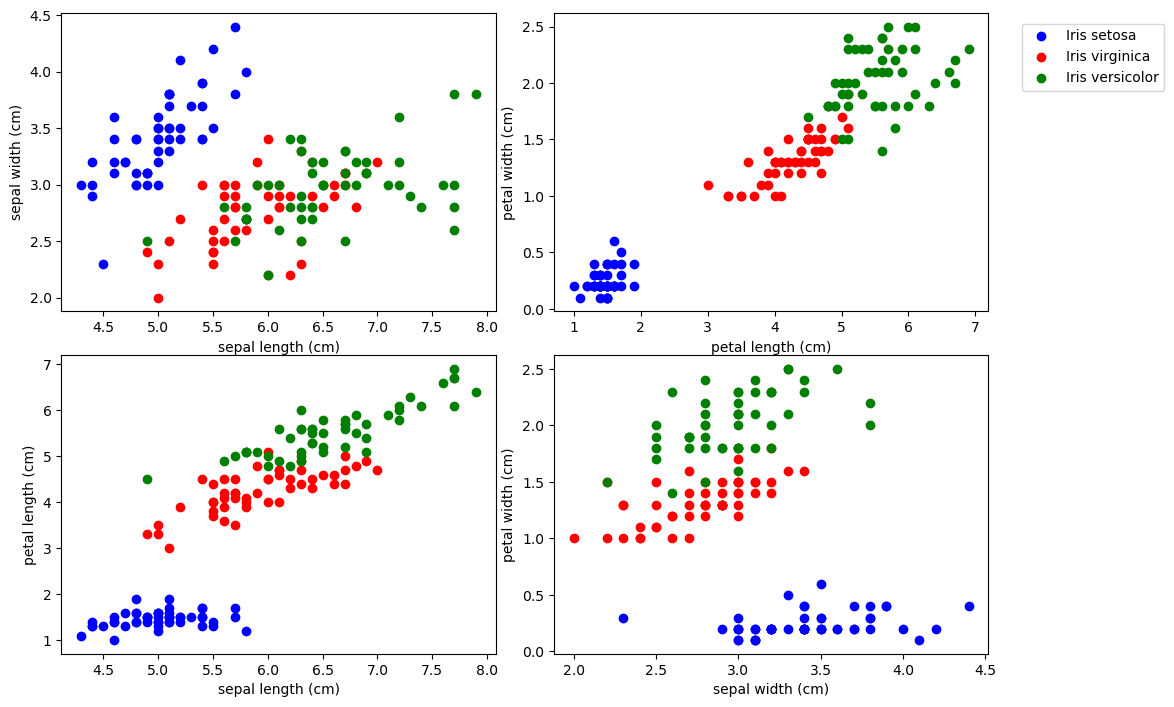

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [9]:
X = df.drop('target',axis=1)
y = df['target']

In [10]:
#Convert X and Y dtype from pandas to numpy array
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split = train_test_split(X,y,test_size=0.2,random_state=33)

In [15]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
y_train = torch.LongTensor(y_train)

In [17]:
y_test = torch.LongTensor(y_test)

In [18]:

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [20]:
#EPOCHS? Start with small epochs and then after training change it accordinly.

#An epoch, 1 run through all the training data

epochs = 100
losses = []

for i in range(epochs):
    
    #Forward into the network and get a prediction
    
    y_pred = model.forward(X_train)
    
    #Calculate loss/error
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
    
    #BackPropagation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507114171981812
Epoch 10 and loss is: 0.9377315640449524
Epoch 20 and loss is: 0.7798256278038025
Epoch 30 and loss is: 0.6099401712417603
Epoch 40 and loss is: 0.40079936385154724
Epoch 50 and loss is: 0.2543632686138153
Epoch 60 and loss is: 0.15053054690361023
Epoch 70 and loss is: 0.10086946934461594
Epoch 80 and loss is: 0.08128315955400467
Epoch 90 and loss is: 0.07231428474187851


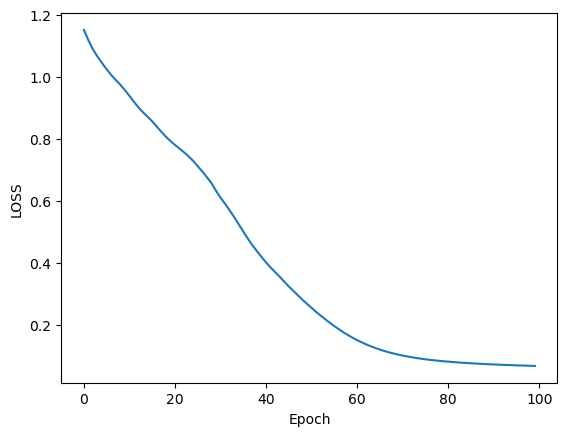

In [24]:
with torch.no_grad():
    plt.plot(range(epochs),losses)
    plt.ylabel('LOSS')
    plt.xlabel('Epoch')

In [25]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [26]:
loss

tensor(0.0581)

In [27]:
#This loss value pf 0.05 signifies good results as it is similar to the results from the training data. 
#If we overfit or underfit the data this prediction on the test data would have yeild poor results and high loss value.

In [28]:
#Get the number of correct predictions we get:

correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1} .)    {str(y_val)}    {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
    
    print(f'We got {correct} correct results!')
        

1 .)    tensor([-2.1252,  4.8064, -0.8628])    1
2 .)    tensor([-1.7985,  5.3098, -1.5449])    1
3 .)    tensor([  6.3542,   0.8438, -10.0541])    0
4 .)    tensor([-3.9123,  4.5958,  1.1693])    1
5 .)    tensor([-7.4713,  3.2021,  5.7853])    2
6 .)    tensor([-10.4976,   1.6459,   9.6297])    2
7 .)    tensor([  6.3201,   0.9917, -10.1532])    0
8 .)    tensor([  7.0468,   0.7059, -10.9137])    0
9 .)    tensor([-7.2061,  3.3477,  5.3565])    2
10 .)    tensor([-9.3960,  2.5759,  8.1033])    2
11 .)    tensor([-9.8808,  2.3475,  8.7141])    2
12 .)    tensor([ 6.2748,  0.6655, -9.7613])    0
13 .)    tensor([-9.3142,  2.1880,  8.1947])    2
14 .)    tensor([-3.7803,  4.5050,  1.0752])    1
15 .)    tensor([-7.8657,  3.0117,  6.2303])    2
16 .)    tensor([-1.8867,  5.1572, -1.3345])    1
17 .)    tensor([-5.7006,  3.5030,  3.6696])    2
18 .)    tensor([  7.1789,   0.7369, -11.1350])    0
19 .)    tensor([-3.2944,  4.7931,  0.3475])    1
20 .)    tensor([-7.7665,  3.7629,  5.7095])

In [29]:
#save the trained model to a file:

torch.save(model.state_dict(),'my_iris_model.pt')

#if you want to save the entire model including the model class we made earlier then we use torch.save(model,'my_iris_model.pt') and save as a pickle file as.pkl
#the model.state_dict() will keep the state of the model i.e the weight and bias.

In [30]:
new_model = Model()  # ?? W or B
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [31]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [38]:
#Using this model on brand new totally unseen data

mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

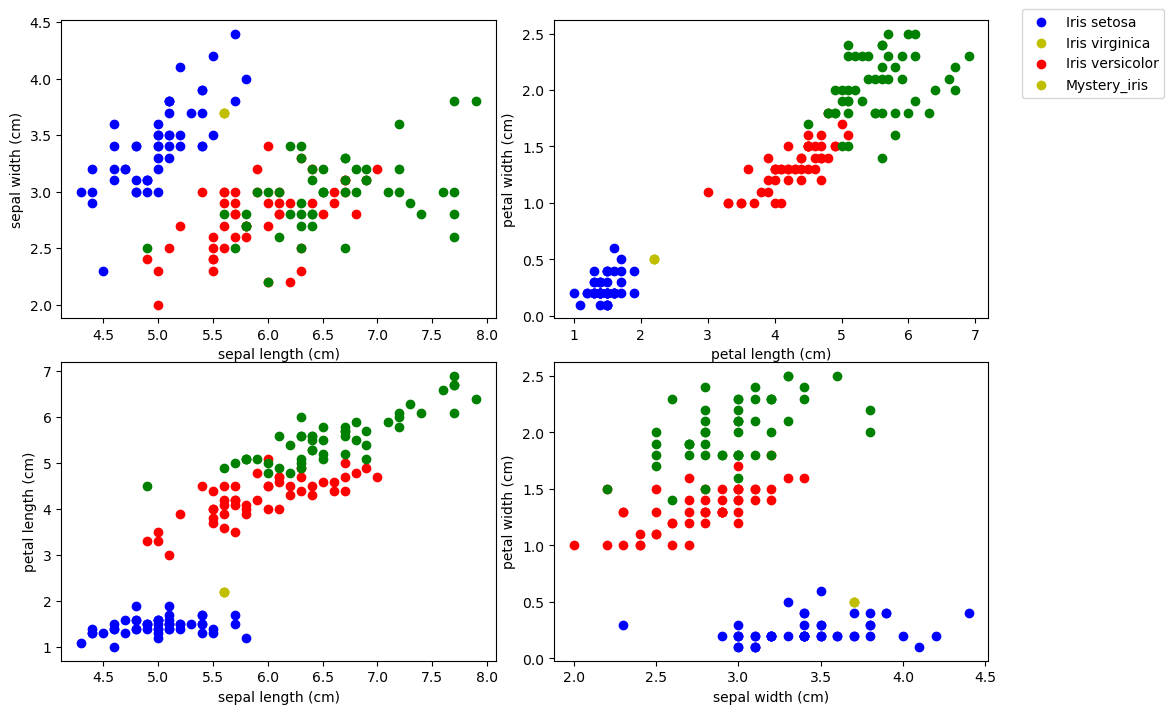

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery_iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
        #Add a plot for mystery iris
        
        ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]],color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [40]:
#based on the above plot our new mystery iris should lie in the iris setosa category i.e index 0.

with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9522,   1.5596, -10.0054])
tensor(0)


In [ ]:
#Our model is able to succesfully predict the class of the new iris. 